<a href="https://colab.research.google.com/github/Alao001/Computer-Vision-Medical-imaging/blob/main/Medical_Data_Manipulation_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dschettler8845_brats_2021_task1_path = kagglehub.dataset_download('dschettler8845/brats-2021-task1')

print('Data source import complete.')


# **Week 6 Assignment: Medical Data Manipulation and Preprocessing**

## **Overview**
In this assignment, you will work with **3D MRI scans** from the **BraTS2021 dataset** available on **Kaggle**. You will focus on essential data preprocessing techniques used in medical imaging.  

### **Dataset**
- Use the **[BraTS2021 dataset](https://www.kaggle.com/datasets/dschettler8845/brats-2021-task1)** from Kaggle.
- Ensure proper handling of `.nii.gz` files, which contain 3D MRI scans.

## **Assignment Tasks**
### ✅ **Task 1: Load a 3D MRI Scan**
- Extract and load a **3D MRI scan** from a `.tar` archive.
- Handle file paths and ensure proper loading of the `.nii.gz` format.

### ✅ **Task 2: Apply Preprocessing and Visualization**
- Normalize and preprocess the MRI images.
- Use **visualization techniques** to inspect different slices of the scan.

### ✅ **Task 3: Perform Image Augmentation**
- Apply **data augmentation** techniques such as rotation, flipping, and intensity adjustments.
- Increase dataset variability to improve model generalization.

### ✅ **Task 4: Implement a PyTorch DataLoader**
- Write a **PyTorch DataLoader** to efficiently load and process the images.
- Ensure it supports **batching, shuffling, and transformations**.

## **Submission Guidelines**
1. **Use GitHub for submission**:
   - Accept the assignment using your **Team's GitHub account**.
   - Use the **provided Template Notebook** as a guide.
  
2. **Push your final notebook**:
   - Ensure your **notebook (.ipynb)** is well-structured and documented.
   - Include code comments and markdown explanations for clarity.
   - Provide sample **visualizations and outputs** for each step.

## 📝 Note:

Feel free to add additional code cells as needed to experiment, debug, or explore the dataset further.

## 💡 Reminder:

Include answers to the questions as **comments in your code** to demonstrate your understanding.

- Use `#` for single-line comments.
- Use `""" """` for multi-line explanations where needed.

## 📂 Task 1: Load the MRI Image  

### 🔹 Step 1: Extract the `BraTS2021_00495.tar` file.
- Unpack the `.tar` archive to access the MRI scan files.

### 🔹 Step 2: Load the MRI Modalities and Segmentation Mask  
- Load the following **NIfTI** (`.nii.gz`) files:
  - `T1` (T1-weighted image)  
  - `T1ce` (T1-weighted image with contrast enhancement)  
  - `T2` (T2-weighted image)  
  - `Flair` (Fluid-attenuated inversion recovery)  
  - **Segmentation mask**  

### 🔹 Step 3: Convert to NumPy Array and Display Shape  
- Convert each loaded image into a **NumPy array**.  
- Print the shape of each array to verify its dimensions.
- Display sample slices for visualisation.


In [ ]:
# Extrating the data
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_00495.tar

./
./BraTS2021_00495_flair.nii.gz
./BraTS2021_00495_seg.nii.gz
./BraTS2021_00495_t1.nii.gz
./BraTS2021_00495_t1ce.nii.gz
./BraTS2021_00495_t2.nii.gz


In [ ]:
import SimpleITK as sitk
# Load an image in SimpleITK format
sitk_image_flair = sitk.ReadImage('/kaggle/working/BraTS2021_00495_flair.nii.gz')
sitk_image_t1 = sitk.ReadImage('/kaggle/working/BraTS2021_00495_t1.nii.gz')
sitk_image_t1ce = sitk.ReadImage('/kaggle/working/BraTS2021_00495_t1ce.nii.gz')
sitk_image_t2 = sitk.ReadImage('/kaggle/working/BraTS2021_00495_t2.nii.gz')
sitk_image_seg = sitk.ReadImage('/kaggle/working/BraTS2021_00495_seg.nii.gz')

In [ ]:
# (1)Convert the SimpleITK image to a numpy array
np_array_flair = sitk.GetArrayFromImage(sitk_image_flair)
np_array_t1 = sitk.GetArrayFromImage(sitk_image_t1)
np_array_t1ce = sitk.GetArrayFromImage(sitk_image_t1ce)
np_array_t2 = sitk.GetArrayFromImage(sitk_image_t2)
np_array_seg = sitk.GetArrayFromImage(sitk_image_seg)

In [ ]:
print(np_array_flair.shape,np_array_t1.shape,np_array_t1ce.shape,np_array_t2.shape,np_array_seg.shape)

(155, 240, 240) (155, 240, 240) (155, 240, 240) (155, 240, 240) (155, 240, 240)


## 🖼️ Task 2: Visualizing MRI Slices  

### 🔹 Step 1: Extract the Middle Slice  
- Select the **middle slice** from each **MRI modality** (`T1`, `T1ce`, `T2`, `Flair`) and the **segmentation mask** along the axial plane.

### 🔹 Step 2: Display the Slices Using Matplotlib  
- Use **Matplotlib** to visualise the extracted slices.
- Arrange the images in a grid for better comparison.

### 🔹 Step 3: Label Each Image  
- Ensure each displayed slice is labelled with its corresponding **modality name** (`T1`, `T1ce`, `T2`, `Flair`, `Segmentation Mask`).  
- Use appropriate **colour maps** to differentiate between MRI images and segmentation masks.

In [ ]:
#Step 1: Extract the Middle Slice
import numpy as np
import matplotlib.pyplot as plt



# Extract middle slices (axial plane)
middle_slice = np_array_flair.shape[0] // 2

flair_slice = np_array_flair[middle_slice, :, :]
t1_slice = np_array_t1[middle_slice, :, :]
t1ce_slice = np_array_t1ce[middle_slice, :, :]
t2_slice = np_array_t2[middle_slice, :, :]
seg_slice = np_array_seg[middle_slice, :, :]


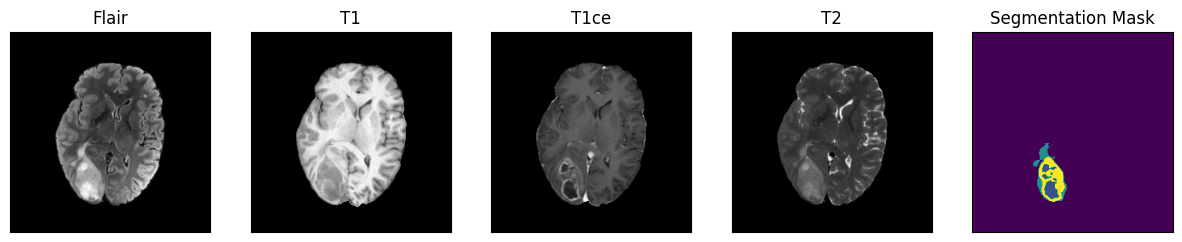

In [ ]:
# Display slices using Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(flair_slice, cmap='gray')
plt.title('Flair')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 2)
plt.imshow(t1_slice, cmap='gray')
plt.title('T1')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 3)
plt.imshow(t1ce_slice, cmap='gray')
plt.title('T1ce')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 5, 4)
plt.imshow(t2_slice, cmap='gray')
plt.title('T2')
plt.xticks([])
plt.yticks([])



plt.subplot(1, 5, 5)
plt.imshow(seg_slice, cmap='viridis')  # Use 'viridis' colormap for segmentation
plt.title('Segmentation Mask')
plt.xticks([])
plt.yticks([])

plt.show()


## 🛠️ Task 3: Data Augmentation  

In this task, you will apply **various transformations** to MRI scans using **TorchIO** and visualise the effects.

### 🔹 Installing TorchIO  
Before applying transformations, ensure that **TorchIO** is installed using the command:
`!pip install torchio`  

### 🔹 Transformations to Apply:
1️⃣ **Flip on the anteroposterior axis** (Always applied).  
2️⃣ **Flip on the lateral axis** (*50% probability*).  
3️⃣ **Centre Crop** to `(160, 160, 100)`.  
4️⃣ **Resample** to `0.75mm` isotropic resolution.
5️⃣ **Apply either the elastic or affine transformation** (*60% probability of Elastic*).  
6️⃣ **Blur the image** (*60% probability*).  
7️⃣ **Add Gaussian noise** (`mean=128, std=10`) **or rescale intensity**.  
8️⃣ **Apply Z-score normalisation**.  
9️⃣ **Concatenate 5 transformations** using `torchio.Compose()`.  

### 🔹 Applying the Transformations  
- Utilize **TorchIO** to implement the transformations on MRI scans.  
- Ensure each transformation is applied according to its specified probability.
- Maintain consistency in the processing pipeline.

### 🔹 Visualization  
- Display **before-and-after** MRI slices to observe the effects of transformations.
- Use **Matplotlib** for plotting.
- Label and organise images for clarity.

By the end of this task, you will gain hands-on experience with **data augmentation techniques** that enhance the generalizability of medical imaging models. 🚀  


In [ ]:
# install torchio
!pip install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjit

# **Transformatioms**

In [ ]:
import torchio as tio

# Load a NIfTI image
image_flair =tio.ScalarImage('/kaggle/working/BraTS2021_00495_flair.nii.gz')
image_t1 =tio.ScalarImage('/kaggle/working/BraTS2021_00495_t1.nii.gz')
image_t1ce =tio.ScalarImage('/kaggle/working/BraTS2021_00495_t1ce.nii.gz')
image_t2 =tio.ScalarImage('/kaggle/working/BraTS2021_00495_t2.nii.gz')
image_seg =tio.ScalarImage('/kaggle/working/BraTS2021_00495_seg.nii.gz')

In [ ]:
import nibabel as nib

# Load the medical image file
img_flair = nib.load('/kaggle/working/BraTS2021_00495_flair.nii.gz')
img_t1 = nib.load('/kaggle/working/BraTS2021_00495_t1.nii.gz')
img_t1ce = nib.load('/kaggle/working/BraTS2021_00495_t1ce.nii.gz')
img_t2 = nib.load('/kaggle/working/BraTS2021_00495_t2.nii.gz')
img_seg = nib.load('/kaggle/working/BraTS2021_00495_seg.nii.gz')

# Print the nib object
# print the header
# access header attributes


# Extract the image data as a numpy array
data = img_flair.get_fdata()

nif_img = nib.Nifti1Image(data, img_flair.affine)


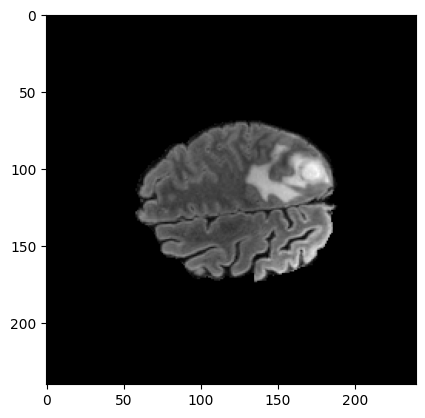

In [ ]:

slice_index = data.shape[0] // 2  # Select the middle slice
image_slice = data[:,:,slice_index]  # Extract the 2D slice
plt.imshow(image_slice, cmap='gray') # Use 'gray' colormap for medical images

In [ ]:
#print header
hdr = img_flair.header
print(hdr)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -0.  0.]
srow_y          : 

In [ ]:
image_flair_data = img_flair.get_fdata()

print(type(image_flair_data)) # it's a numpy memory-map
print(f"T1 Shape: {image_flair_data.shape}")

<class 'numpy.ndarray'>
T1 Shape: (240, 240, 155)


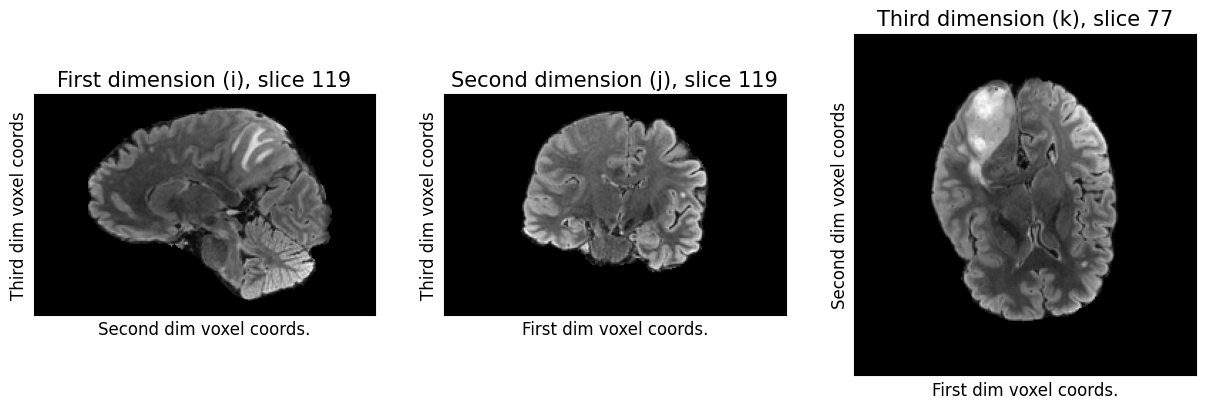

In [ ]:
 # specify the indices for each slice (here using the center)
def make_slices(img_data):
    n_i, n_j, n_k = img_data.shape  # Use the shape of the input img_data
    i_idx = (n_i - 1) // 2  # // for integer division
    j_idx = (n_j - 1) // 2
    k_idx = (n_k - 1) // 2
    slice_0 = img_data[i_idx, :, :]
    slice_1 = img_data[:, j_idx, :]
    slice_2 = img_data[:, :, k_idx]
    return [slice_0, slice_1, slice_2], i_idx, j_idx, k_idx  # Return the indices

    # Function to display row of image slices
def show_slices(slices, i, j, k):
    fig, axes = plt.subplots(1, len(slices), figsize=(15, 15))
    for idx, slice_data in enumerate(slices):
        axes[idx].imshow(slice_data.T, cmap="gray", origin="lower")
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])

        axes[0].set_xlabel('Second dim voxel coords.', fontsize=12)
        axes[0].set_ylabel('Third dim voxel coords', fontsize=12)
        axes[0].set_title(f'First dimension (i), slice {i}', fontsize=15)

        axes[1].set_xlabel('First dim voxel coords.', fontsize=12)
        axes[1].set_ylabel('Third dim voxel coords', fontsize=12)
        axes[1].set_title(f'Second dimension (j), slice {j}', fontsize=15)

        axes[2].set_xlabel('First dim voxel coords.', fontsize=12)
        axes[2].set_ylabel('Second dim voxel coords', fontsize=12)
        axes[2].set_title(f'Third dimension (k), slice {k}', fontsize=15)

    # display slices calling our function
slices_to_show, i_center, j_center, k_center = make_slices(image_flair_data)
show_slices(slices_to_show, i_center, j_center, k_center)



<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine:
[[ -1.  -0.  -0.   0.]
 [ -0.  -1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b  

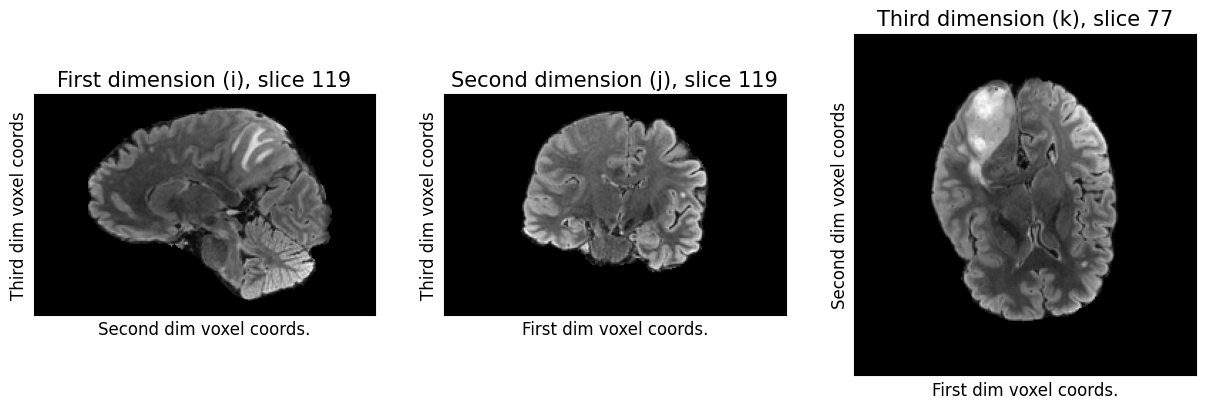

In [ ]:
# Apply Z-score normalization
transform = tio.ZNormalization()
normalized_img = transform(img_flair)
print(normalized_img)

normalized_img_data = normalized_img.get_fdata()
# display the normalized image
slices_to_show, i_center, j_center, k_center = make_slices(normalized_img_data)
show_slices(slices_to_show, i_center, j_center, k_center)
#show_slices(make_slices(image_flair_data))
#show_slices(make_slices(normalized_img.squeeze(0)))



**Flipping**

In [ ]:
import torch
#Convert the 3D image data to 4D [chanel, x, y, z]
img_flair_data = torch.tensor(image_flair_data)  # Convert to torch.Tensor
image_plus_dim = img_flair_data.unsqueeze(0) #Add a channel dimension → Shape becomes (1, 240, 240, 155)

In [ ]:
## Using TorchIO
flip_transform =  tio.Flip(axes=('LR',))  # Flip LR
tio_flipped_image = flip_transform(image_plus_dim)

print(f"Slices Before Flipping")
#show_slices(make_slices(tio_flipped_image.squeeze(0)))
tio_flipped_image_data = tio_flipped_image.numpy().squeeze()
image_plus_dim_data = image_plus_dim.numpy().squeeze()
# display the normalized image
# display the normalized image
slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)


Slices After Flipping


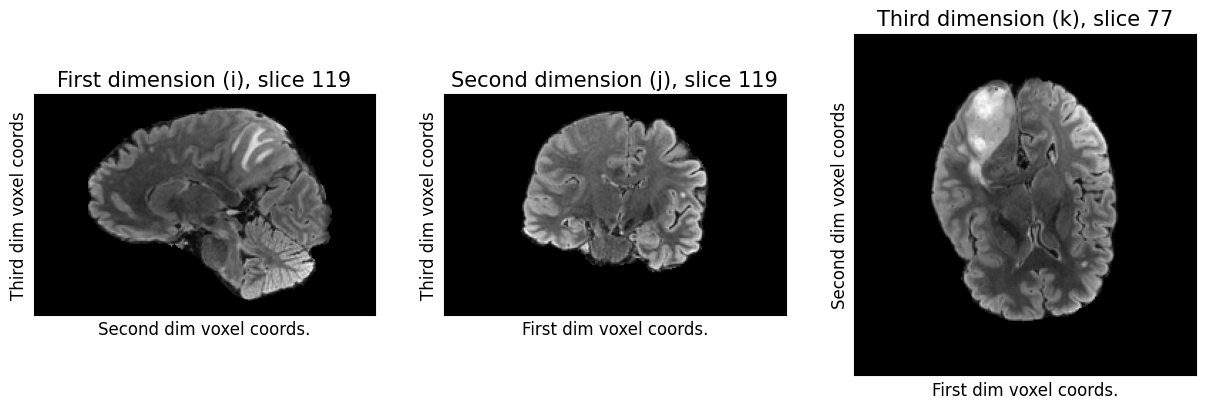

In [ ]:
print(f"Slices After Flipping")
slices_to_show, i_center, j_center, k_center = make_slices(tio_flipped_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

Slices Before Flip on the lateral axis with 50% probability
Slices After Flip on the lateral axis with 50% probability


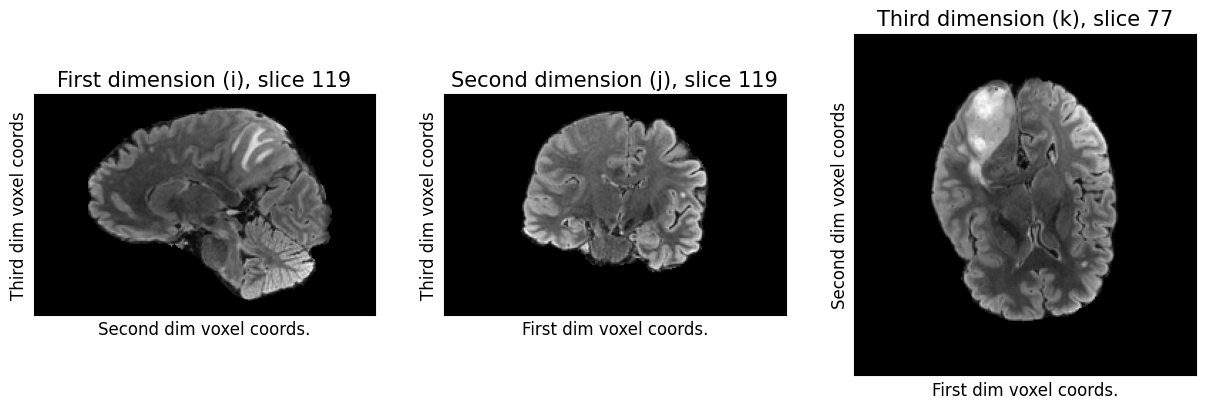

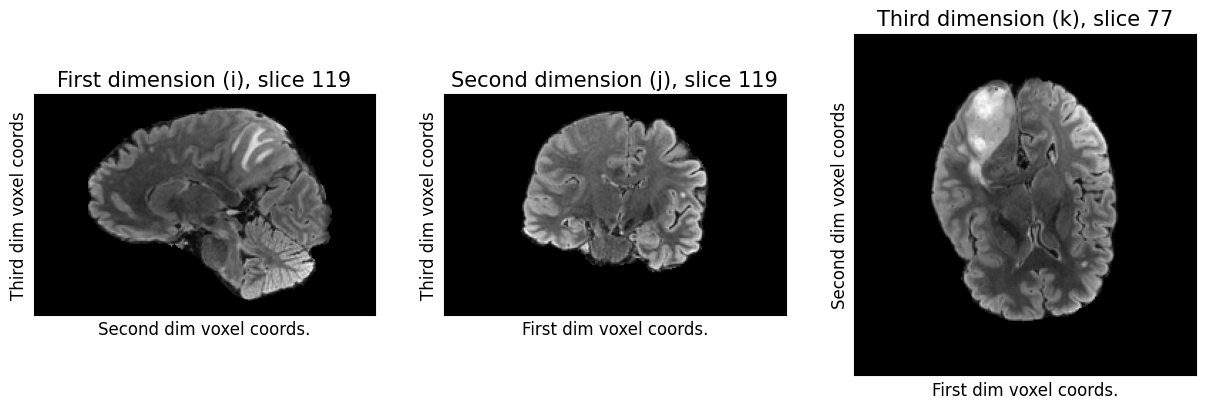

In [ ]:

# Flip on the lateral axis with 50% probability using RandomFlip
flip_transform = tio.RandomFlip(axes=('AP',), flip_probability=0.5)  # Flip Anterior-Posterior (lateral) with 50% probability
tio_flipped_image = flip_transform(image_plus_dim)
print(f"Slices Before Flip on the lateral axis with 50% probability")
image_plus_dim_data = image_plus_dim.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)
print(f"Slices After Flip on the lateral axis with 50% probability")
tio_flipped_image_data = tio_flipped_image.numpy().squeeze()
# display  image
slices_to_show, i_center, j_center, k_center = make_slices(tio_flipped_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

**Cropping**

Slices Before cropping
Slices After Cropping


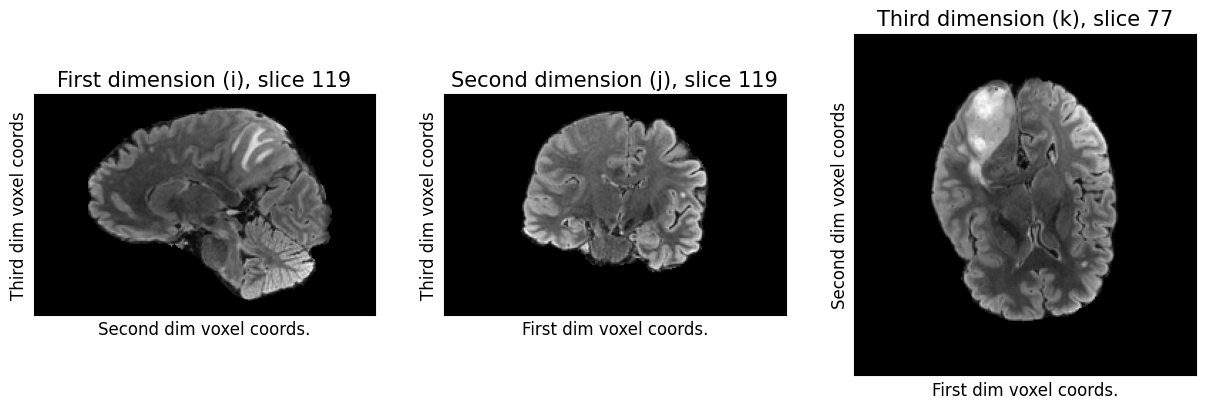

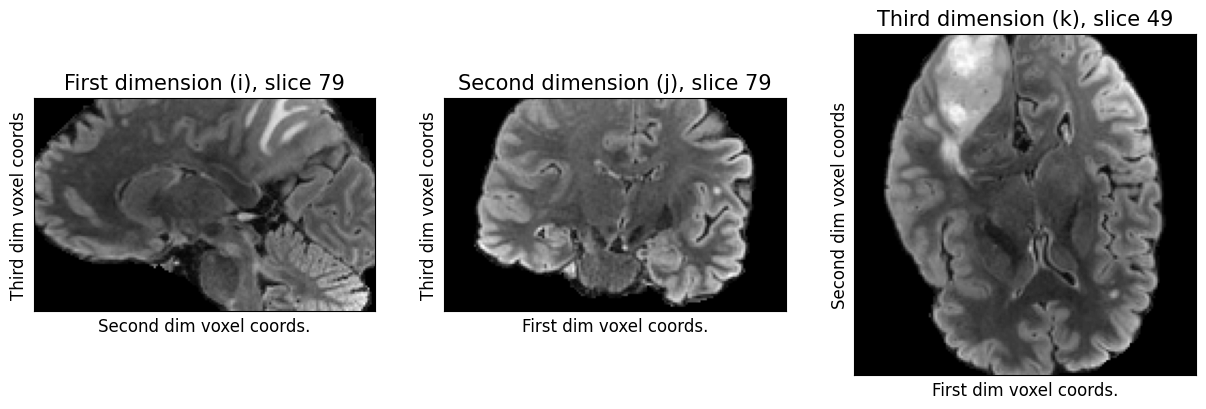

In [ ]:
crop_transform = tio.CropOrPad(target_shape=(160, 160, 100))
cropped_image = crop_transform(image_plus_dim) # Apply crop

print(f"Slices Before cropping")
image_plus_dim_data = image_plus_dim.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)
print(f"Slices After Cropping")
tio_cropped_image_data = cropped_image.numpy().squeeze()
# display the cropped image
slices_to_show, i_center, j_center, k_center = make_slices(tio_cropped_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

Slices Before Resample to 0.75mm isotropic resolution
Slices After Resample to 0.75mm isotropic resolution


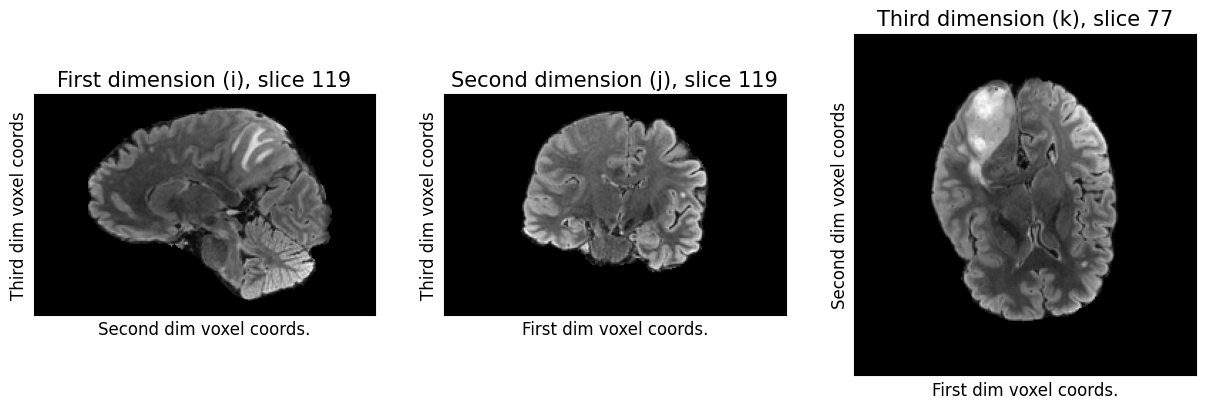

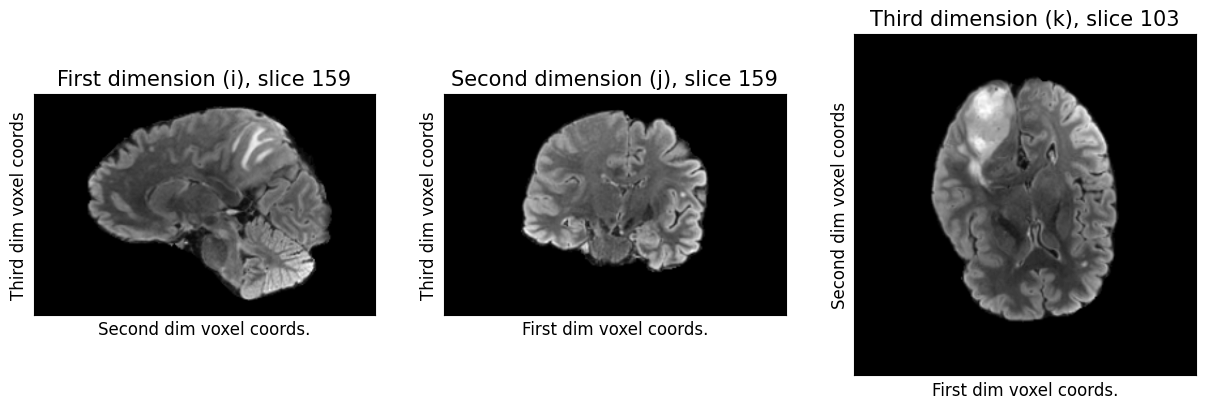

In [ ]:
# Resample to 0.75mm isotropic resolution
resample_transform = tio.Resample(target=(0.75, 0.75, 0.75))
resampled_image = resample_transform(image_plus_dim)

print(f"Slices Before Resample to 0.75mm isotropic resolution")
image_plus_dim_data = image_plus_dim.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)
print(f"Slices After Resample to 0.75mm isotropic resolution")
resample_image_data = resampled_image.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(resample_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

Slices Before Applying Elastic Transformation (60% probability)
Slices After Applying Elastic Transformation (60% probability)


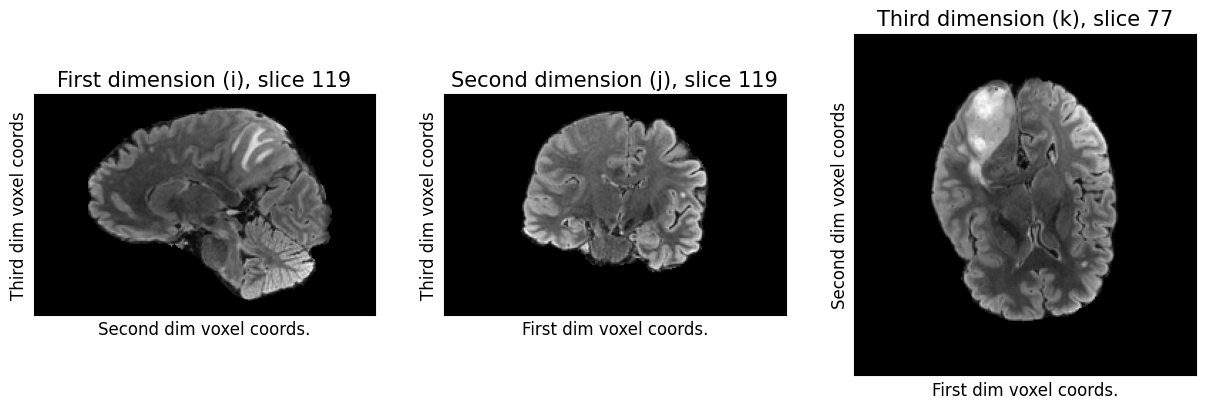

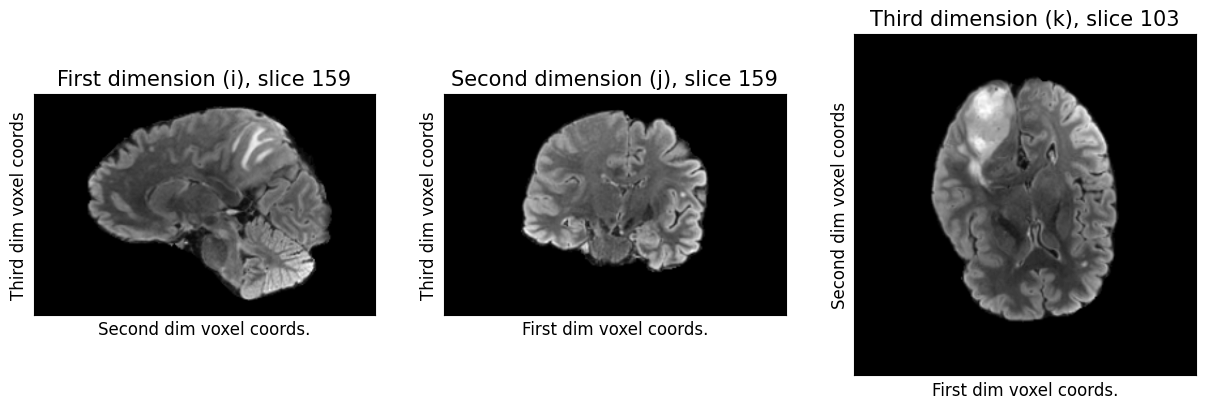

In [ ]:


# Apply elastic transformation
elastic_transform = tio.ElasticDeformation(control_points=(7, 7, 7),
                    max_displacement=(7.5, 7.5, 7.5),
                    p=0.6)  # Apply with 60% probability
transformed_image = elastic_transform(resampled_image)

print(f"Slices Before Applying Elastic Transformation (60% probability)")
image_plus_dim_data = image_plus_dim.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)
print(f"Slices After Applying Elastic Transformation (60% probability)")

transformed_image_data = transformed_image.numpy().squeeze()
# display the cropped image
slices_to_show, i_center, j_center, k_center = make_slices(transformed_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

Slices Before Apply Gaussian blur with 60% probability
Slices After Apply Gaussian blur with 60% probability


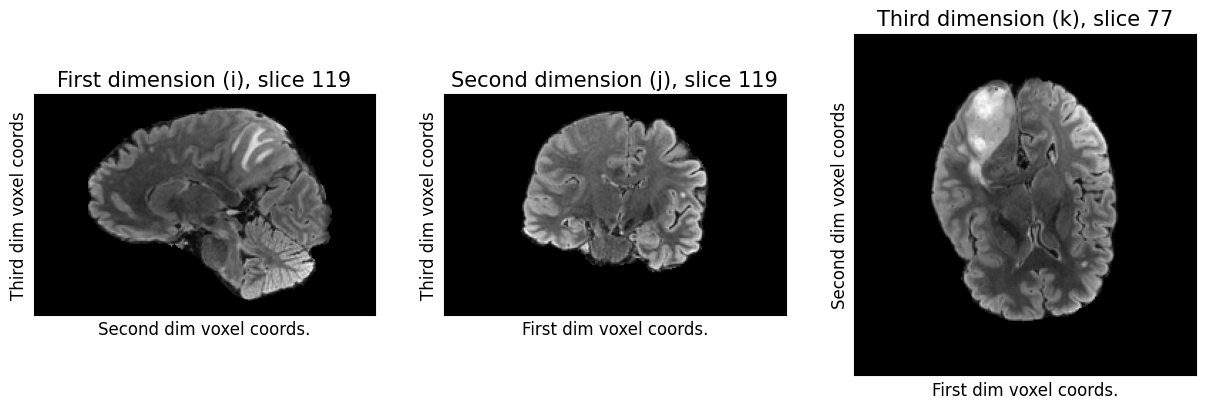

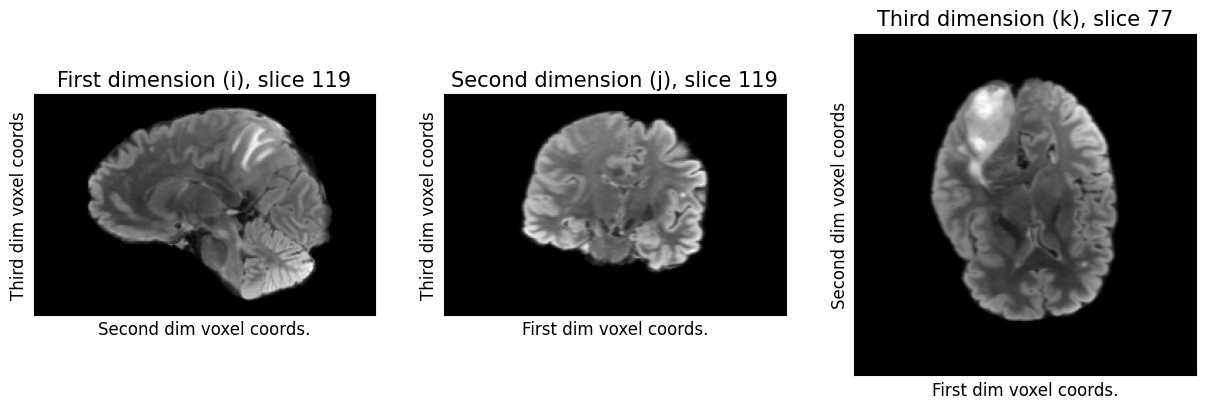

In [ ]:
# Apply Gaussian blur with 60% probability
blur_transform = tio.RandomBlur(p=0.6)
blurred_image = blur_transform(image_plus_dim)

print(f"Slices Before Apply Gaussian blur with 60% probability")
image_plus_dim_data = image_plus_dim.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)
print(f"Slices After Apply Gaussian blur with 60% probability")

blurred_image_data = blurred_image.numpy().squeeze()
# display the blurred image
slices_to_show, i_center, j_center, k_center = make_slices(blurred_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

Slices Before Adding Gaussian noise (mean=128, std=10)
Slices After Adding Gaussian Noise (mean=128, std=10)


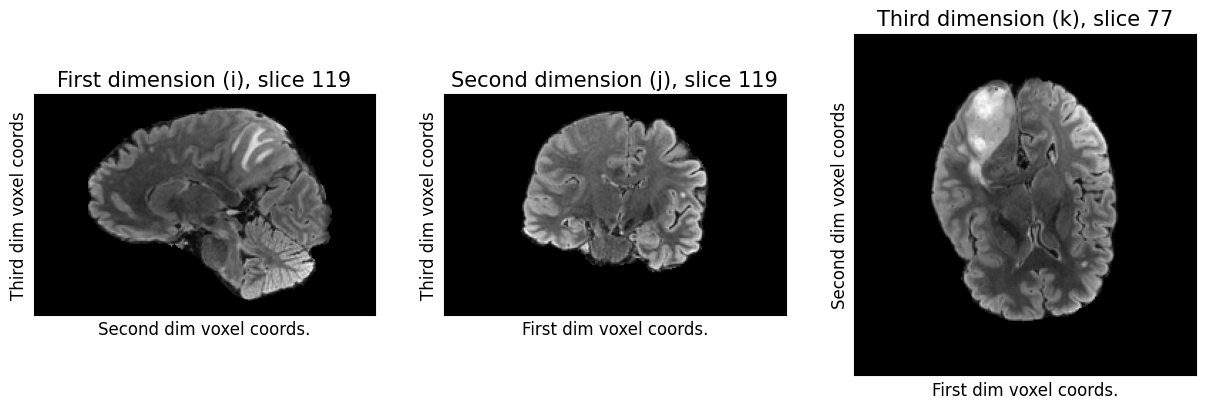

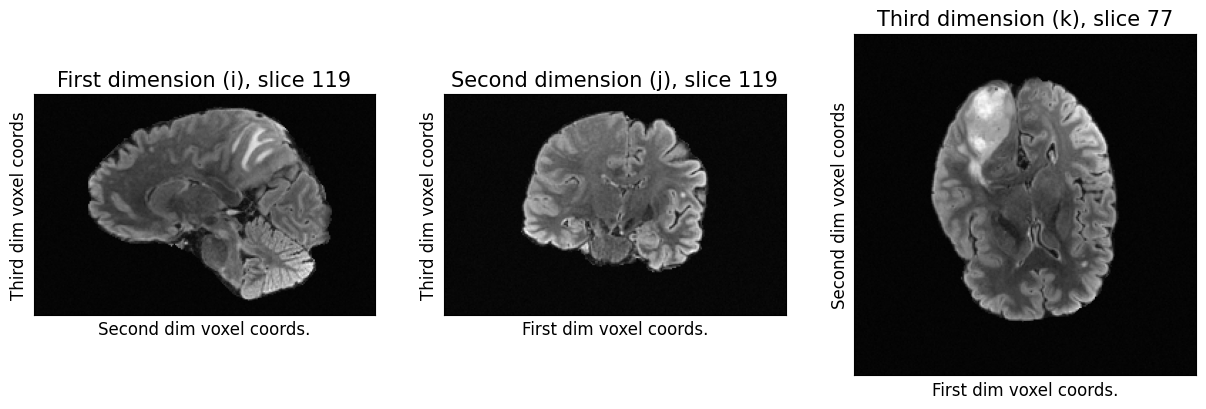

In [ ]:
# Add Gaussian noise (mean=128, std=10)
noise_transform = tio.RandomNoise(mean=128, std=10)
noisy_image = noise_transform(image_plus_dim)

print(f"Slices Before Adding Gaussian noise (mean=128, std=10)")
image_plus_dim_data = image_plus_dim.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)

print(f"Slices After Adding Gaussian Noise (mean=128, std=10)")

# Get the NumPy array from the noisy TorchIO image
noisy_image_data = noisy_image.numpy().squeeze() #

# display the noisy image
slices_to_show, i_center, j_center, k_center = make_slices(noisy_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

Slices Before Concatenate the 5 transformations
Slices After Concatenate the 5 transformations


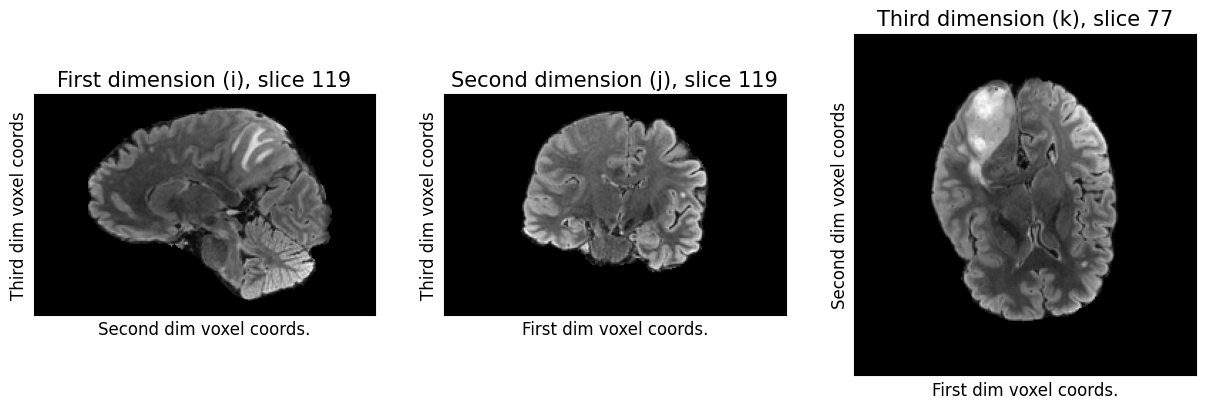

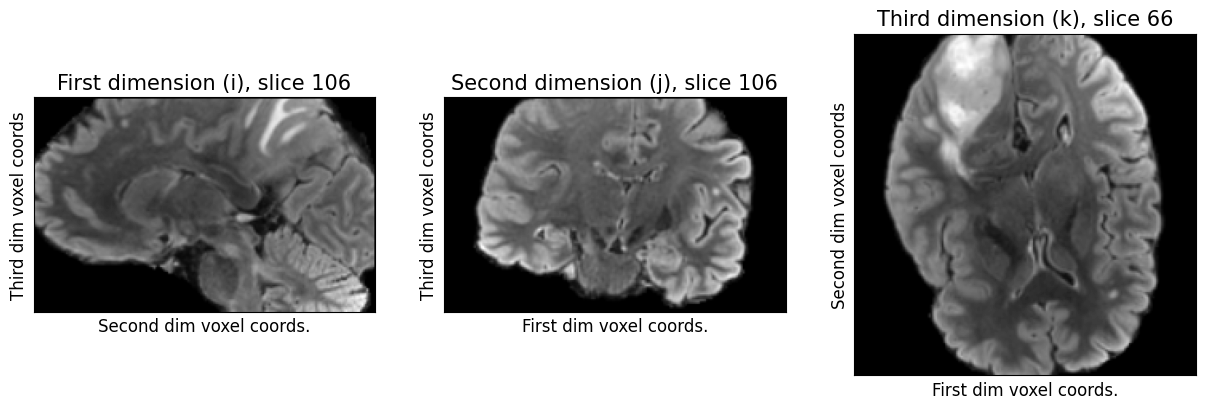

In [ ]:

# Concatenate the 5 transformations using tio.Compose()
transformations = tio.Compose([
    flip_transform,
    crop_transform,
    resample_transform,
    elastic_transform,
    blur_transform,
])
# Apply the composed transformations to the image
transformed_image = transformations(image_plus_dim)
print(f"Slices Before Concatenate the 5 transformations")
image_plus_dim_data = image_plus_dim.numpy().squeeze()

slices_to_show, i_center, j_center, k_center = make_slices(image_plus_dim_data)
show_slices(slices_to_show, i_center, j_center, k_center)



print(f"Slices After Concatenate the 5 transformations")

# Get the NumPy array from the transformed TorchIO image
transformed_image_data = transformed_image.numpy().squeeze()

# display the noisy image
slices_to_show, i_center, j_center, k_center = make_slices(transformed_image_data)
show_slices(slices_to_show, i_center, j_center, k_center)

## ✅ Question: Understanding Data Augmentation in Medical Imaging  

### 🔹 Why do we use different probabilities for transformations?  
In medical image preprocessing, we often apply **data augmentation** to introduce variability and improve model generalization. However, not all transformations should be applied with the same probability.  

- Why do some transformations have **fixed application** while others have a **probabilistic approach**?  
- How does this affect the **realism and effectiveness** of data augmentation?  

Some transformations are applied with a fixed probability (100%) because they address inherent issues or standardize the data in a way that is crucial for the model to learn effectively without altering the underlying diagnostic information.

Balance augmentation strength to improve generalization without causing information loss or the learning of artifacts.

Avoiding Unrealistic Artifacts: Some aggressive transformations, if applied with high probability, can create anatomically implausible or diagnostically misleading images (e.g., extreme rotations or flips of asymmetric organs). Using lower probabilities for such transformations reduces the risk of the model being trained on unrealistic data, which could negatively impact its performance on real-world images.

Reduced Overfitting: Data augmentation, in general, helps to reduce overfitting by increasing the effective size and diversity of the training data.

 Probabilistic application ensures that the model doesn't overly rely on specific augmented versions of the training data, encouraging it to learn more generalizable features.


## 📦 Task 4: Writing a PyTorch DataLoader  

In this task, you will create a **custom PyTorch Dataset** to efficiently load and preprocess the **BraTS2021** dataset.

### 🔹 Steps to Follow:

1️⃣ **Extract the BraTS2021 Training Dataset**  
   - Locate and extract `"BraTS2021_Training_Data.tar"`.  
   - Ensure that the extracted files contain MRI modalities (`T1, T1ce, T2, Flair`) and segmentation masks (`Seg`).  

2️⃣ **Write a Custom PyTorch Dataset Class**  
   - Define a `Dataset` class that:
     - Reads the **training images** from the extracted dataset.
     - Loads MRI scans in **.nii.gz format**.  
     - Applies the **predefined transformations** from **TorchIO**.  
     - Returns the **image and segmentation mask** as tensors.

3️⃣ **Create a DataLoader**  
   - Initialize the **PyTorch DataLoader** with:  
     - Your **custom dataset**.  
     - `batch_size=5` (processes 5 images at a time).  
     - `shuffle=True` (shuffles data for better training generalisation).

### 🔹 Key Considerations:
✅ Ensure that your dataset class correctly handles **file reading and transformation applications**.  
✅ Verify that your **DataLoader** returns batches in the correct format.
✅ Test your DataLoader by iterating through a few batches and displaying **sample images**.  

By completing this task, you will gain hands-on experience in **handling 3D medical imaging datasets with PyTorch**, an essential skill for deep learning in medical AI. 🚀  

In [ ]:
#Extract the BraTS2021 Training Dataset
!tar -xf /kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar

In [ ]:
# Extrating the data
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_00495.tar

./
./BraTS2021_00495_flair.nii.gz
./BraTS2021_00495_seg.nii.gz
./BraTS2021_00495_t1.nii.gz
./BraTS2021_00495_t1ce.nii.gz
./BraTS2021_00495_t2.nii.gz


In [ ]:
#Write a Custom PyTorch Dataset Class
!pip install --upgrade monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.7 MB/s eta 0:00:000:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [ ]:
from monai.transforms import (
    Compose,
    RandRotate,
    RandFlip,
    RandAffine,
    RandGaussianNoise,
    RandAdjustContrast,
    RandShiftIntensity,
    HistogramNormalize,
)

# Compose a pipeline with several augmentations:
monai_transforms = Compose([
    # Geometric augmentations:
    RandRotate(range_x=15, prob=0.5),                   # Random rotation within ±15° around x-axis
    RandFlip(spatial_axis=0, prob=0.5),                   # Random flipping along the first spatial axis
    RandAffine(
        translate_range=(10, 10, 10),                   # Random translation (shift) up to ±10 voxels
        scale_range=(0.9, 1.1),                         # Random scaling between 90% and 110%
        prob=0.5
    ),
    # Intensity augmentations:
    RandGaussianNoise(prob=0.5, mean=0.0, std=0.05),      # Add random Gaussian noise
    RandAdjustContrast(prob=0.5, gamma=(0.8, 1.2)),         # Adjust image contrast via gamma correction
    RandShiftIntensity(prob=0.5, offsets=(-0.1, 0.1)),      # Shift intensities to simulate brightness changes
    HistogramNormalize()                                  # Normalize the image histogram (akin to histogram equalization)
])

2025-05-08 14:09:56.349973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746713396.601370      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746713396.672170      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
import numpy as np
import nibabel as nib
import torch
from torch.utils.data import Dataset
from monai.transforms import LoadImage

loader = LoadImage(image_only = False)

class BraTS_Dataset(Dataset):
    def __init__(self, data_dir, patient_ids=None, transforms=None, mode='train'):
        """
        Args:
            data_dir (str): Root directory containing subfolders for each patient.
            patient_ids (list, optional): List of patient IDs. If None, the class will use all subdirectories in data_dir.
            transforms (callable, optional): A function/transform that takes in a volume (and segmentation mask)
                                             and returns the transformed version.
            mode (str): 'train' if segmentation masks are available, 'test' otherwise.
        """
        self.data_dir = data_dir
        # If no patient_ids are provided, list only directories from the data_dir
        if patient_ids is None:
            self.patient_ids = [d for d in os.listdir(data_dir)
                                if os.path.isdir(os.path.join(data_dir, d))]
        else:
            self.patient_ids = patient_ids
        self.transforms = transforms
        self.mode = mode

    def __len__(self):
        return len(self.patient_ids)

    def __getitem__(self, idx):
        patient_id = self.patient_ids[idx]
        # Patient folder is expected to be: data_dir/patient_id/
        patient_folder = os.path.join(self.data_dir, patient_id)


        # 1. Load modalities from the patient subfolder.
        modalities = {}
        for modality in ['t1', 't1ce', 't2', 'flair']:
            file_path = os.path.join(patient_folder, f"{patient_id}_{modality}.nii.gz")
            id_img, id_meta_data = loader(file_path)
            modalities[modality] = (id_img, id_meta_data) # create a dictionary Key with modality and values  as a tuple of the image and the meta_data

        seg_img = None
        if self.mode == 'train':
            seg_file = os.path.join(patient_folder, f"{patient_id}_seg.nii.gz")
            seg_img, _ = loader(seg_file)




        # 2.(stack) modalities.
        # Use FLAIR as a reference for affine.
        ref = modalities['flair']
        affine = ref[1]["affine"]   # Get the Affine matrix of the image

        # Extract image data from each modality.
        flair_data = modalities['flair'][0]
        t1_data    = modalities['t1'][0]
        t1ce_data  = modalities['t1ce'][0]
        t2_data    = modalities['t2'][0]

        # Stack modalities along a new axis (creating an array of shape (H, W, D, 4))
        vol = np.stack([flair_data, t1_data, t1ce_data, t2_data], axis=-1)
        # Rearrange dimensions to (C, H, W, D) for deep learning frameworks.
        vol = np.transpose(vol, (3, 0, 1, 2))

        # Create a new NIfTI image for the registered volume.
        vol_img = nib.Nifti1Image(vol, affine)



        # 3. Apply optional transforms.
        if self.transforms is not None:
            if seg_img is not None:
                vol_img, seg_img = self.transforms(vol_img.get_fdata()), self.transforms(seg_img)
            else:
                vol_img = self.transforms(vol_img)

        else:
            vol_img = vol_img.get_fdata()



        # 4. Convert images to NumPy arrays and then to torch.Tensor.
        vol_tensor = torch.from_numpy(vol_img.astype(np.uint8))

        seg_tensor = None
        if seg_img is not None:
            seg_tensor = torch.from_numpy(seg_img.astype(np.uint8))

        return {
            'image': vol_tensor,   # Shape: (4, H, W, D)
            'seg': seg_tensor,     # Shape: (H, W, D) or None
            'patient_id': patient_id
            }

In [ ]:
if __name__ == "__main__":
    data_dir = "/kaggle/working"  # Root directory containing patient subfolders.

    # The class will automatically detect patient subfolders from data_dir.
    dataset = BraTS_Dataset(data_dir, mode='train',transforms=monai_transforms)

    # For example, get the first patient's data.
    sample = dataset[1]
    print("Patient ID:", sample['patient_id'])
    print("Image shape:", sample['image'].shape)  # Expected: (4, H, W, D)
    if sample['seg'] is not None:
        print("Segmentation shape:", sample['seg'].shape)

Patient ID: BraTS2021_01403
Image shape: torch.Size([4, 240, 240, 155])
Segmentation shape: torch.Size([240, 240, 155])


In [ ]:
# Create the dataset using the MONAI transform pipeline.
dataset = BraTS_Dataset(data_dir="/kaggle/working", patient_ids=None, transforms=monai_transforms, mode='train')

In [ ]:
# Build a DataLoader.
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True, num_workers=2)

# Iterate over a batch to see the output.
for batch in dataloader:
    images = batch['image']   # Expected shape: (batch_size, 4, H, W, D)
    segs = batch['seg']       # Expected shape: (batch_size, H, W, D)
    patient_ids = batch['patient_id']
    print("Patient IDs:", patient_ids)
    print("Images shape:", images.shape)
    if segs is not None:
        print("Segmentation shape:", segs.shape)
    break  # Display one batch for demonstration.

Patient IDs: ['BraTS2021_00120']
Images shape: torch.Size([1, 4, 240, 240, 155])
Segmentation shape: torch.Size([1, 240, 240, 155])


## ✅ Question:  

### What does the DataLoader do, and why do we shuffle the data?  

- **What is the role of a PyTorch DataLoader?**  
  - How does it help in efficiently loading and processing large datasets?
  - Why is batch processing important in deep learning?

- **Why do we shuffle the data?**  
  - How does shuffling improve model generalisation?
  - What happens if we don't shuffle the dataset during training?